In [242]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

In [25]:
df_kiva_loans = pd.read_csv('kiva/kiva_loans.csv')
df_mpi = pd.read_csv('kiva/kiva_mpi_region_locations.csv')
df_theme_ids = pd.read_csv('kiva/loan_theme_ids.csv')
df_themes_region = pd.read_csv('kiva/loan_themes_by_region.csv')
df_mpi.dropna()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
1003,"Mashonaland West, Zimbabwe",ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.192,"(-17.4851029, 29.7889248)",-17.485103,29.788925
1004,"Masvingo, Zimbabwe",ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.174,"(-20.0791909, 30.8384093)",-20.079191,30.838409
1005,"Matabeleland North, Zimbabwe",ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.238,"(-18.5331566, 27.5495846)",-18.533157,27.549585
1006,"Matabeleland South, Zimbabwe",ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.164,"(-21.052337, 29.0459927)",-21.052337,29.045993


In [165]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['male', 'female'] else 'group' for elem in df_kiva_loans['borrower_genders']]
# df_kiva_loans.head(5)

In [28]:

sectors = df_kiva_loans['sector'].value_counts()[df_kiva_loans['sector'].value_counts(normalize=True)> 0.005]

In [168]:
df_gender_by_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors.index.values)]\
    .groupby(['sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_sector = df_gender_by_sector[['female', 'male', 'group']]

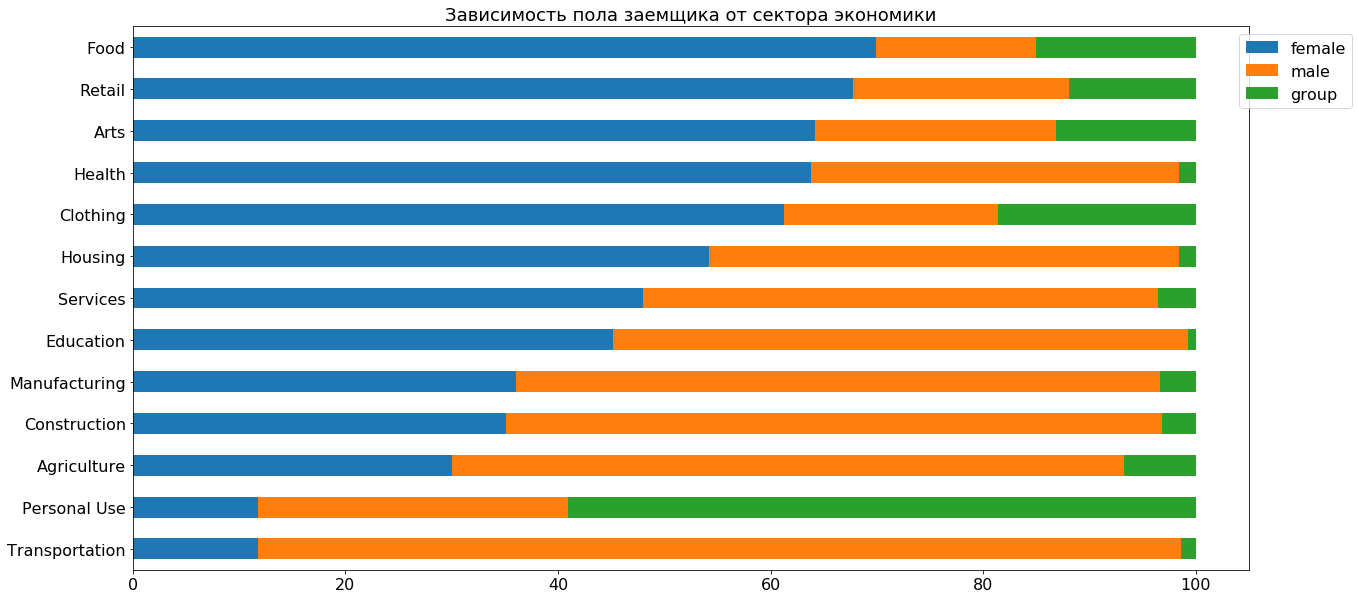

In [169]:
plot = df_gender_by_sector.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Зависимость пола заемщика от сектора экономики')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

## Зависимость пола заемщика от сектора экономики:
По данному графику видно что женщины чаще берут кредиты в следующихъ сферах: Пошив одежды, здоровье, искуство, розничная торговля и еды(???). Мужчины предпочитаю брать кредиты на производство, строительство, сельское хозяйство и перевозки.
Так же следует отметить что на услуши сервиса и образования мужчины и женщины берут кредиты в равных долях.

In [164]:
df_mpi_world_region = df_mpi[['region', 'world_region']].dropna()
# df_mpi_world_region

In [163]:
df_kiva_loans = pd.merge(df_kiva_loans, df_mpi_world_region, on=('region'))
# df_kiva_loans.head()

In [33]:
world_regions = df_kiva_loans['world_region'].value_counts()[df_kiva_loans['world_region'].value_counts(normalize=True)> 0.005]


In [34]:
df_gender_by_world_region = \
    df_kiva_loans[df_kiva_loans['world_region'].isin(world_regions.index.values)]\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_world_region = df_gender_by_world_region[['female', 'male', 'group']]

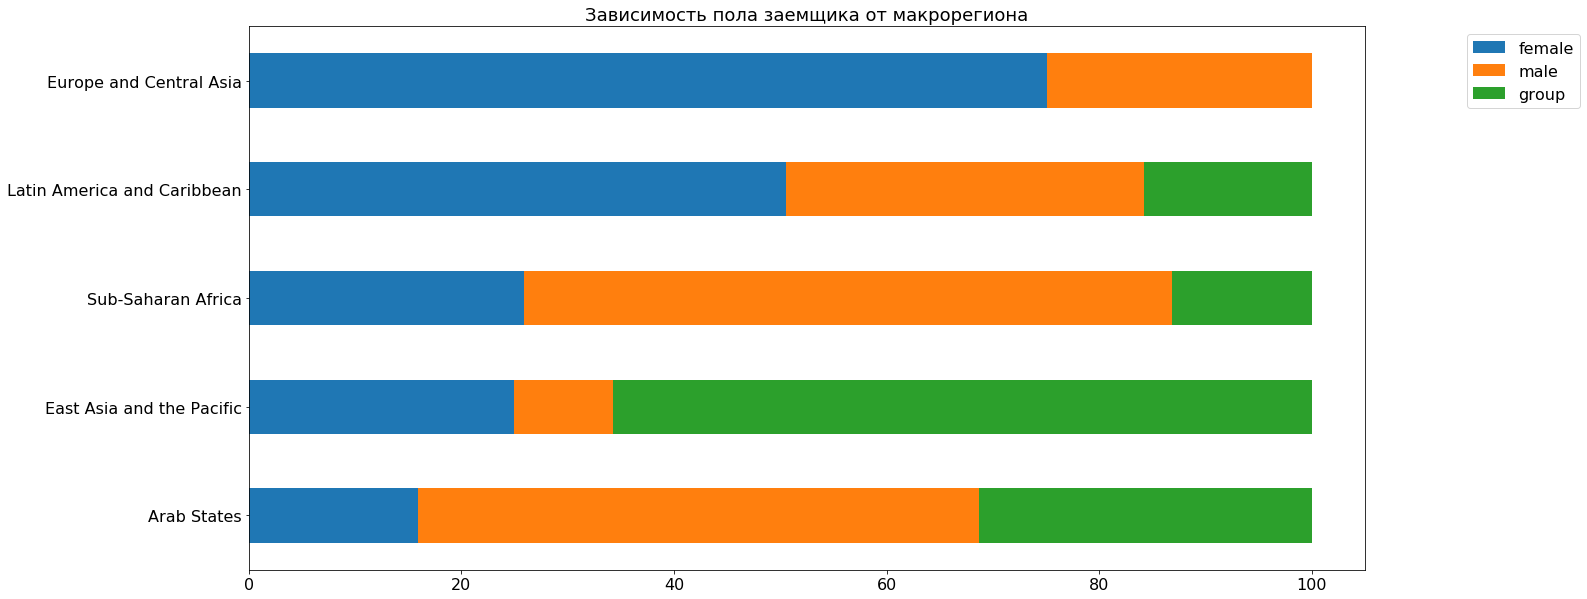

In [171]:
plot = df_gender_by_world_region.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Зависимость пола заемщика от макрорегиона')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

## Зависимость пола заемщика от региона планеты.
Судя по данному графику мы можем сделать следующие выводы:
1. В развитых регионах таких как европа и центральная азия заемы в KIVA берут чаще мужчины (странно что совсем нету групп)
2. В африке и арабских странах чаще все-го берут займы берут чаще женщины.
3. Получение займа группой наиболее распространено в восточной азии и океании, а так же в арабских странах.

In [36]:
df_gender_by_world_region

borrower_genders,female,male,group
world_region,,,
Arab States,15.875170,52.781547,31.343284
East Asia and the Pacific,24.961653,9.283927,65.754420
Sub-Saharan Africa,25.845336,61.018730,13.135934
Latin America and Caribbean,50.535114,33.659498,15.805389
Europe and Central Asia,75.071429,24.928571,0.000000


Зависимость пола заемщика от региона планеты:

In [37]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,2014-01-02 14:25:08+00:00,2013-12-17 08:00:00+00:00,2014-01-08 22:07:48+00:00,14.0,16,#Parent,female,monthly,2014-01-02,Latin America and Caribbean
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,2014-01-02 15:26:18+00:00,2013-12-06 08:00:00+00:00,2014-01-31 14:29:51+00:00,14.0,20,"#Parent, #Inspiring Story, #First Loan, user_f...",male,monthly,2014-01-02,Latin America and Caribbean
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,2014-01-02 14:48:57+00:00,2013-12-17 08:00:00+00:00,2014-01-05 14:27:49+00:00,14.0,8,"volunteer_pick, user_favorite, #Single Parent,...",female,monthly,2014-01-02,Latin America and Caribbean
3,653367,175.0,175.0,Food Market,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,2014-01-02 15:07:23+00:00,2013-12-03 08:00:00+00:00,2014-01-02 22:20:53+00:00,14.0,5,NaN,female,monthly,2014-01-02,Latin America and Caribbean
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,2014-01-02 17:01:15+00:00,2013-12-03 08:00:00+00:00,2014-01-14 18:52:52+00:00,9.0,7,"#Parent, #Supporting Family, #Woman Owned Biz",group,monthly,2014-01-02,Latin America and Caribbean


In [162]:
df_sum_date = df_kiva_loans[['lender_count', 'loan_amount']]
df_sum_date = df_sum_date.groupby(['loan_amount']).mean()

In [161]:
df_sum_term = df_kiva_loans[['loan_amount', 'term_in_months']]
df_sum_term = df_sum_term.groupby(['loan_amount']).mean()

Text(0.5, 1.0, 'Зависимсоть срока займа от суммы кредита')

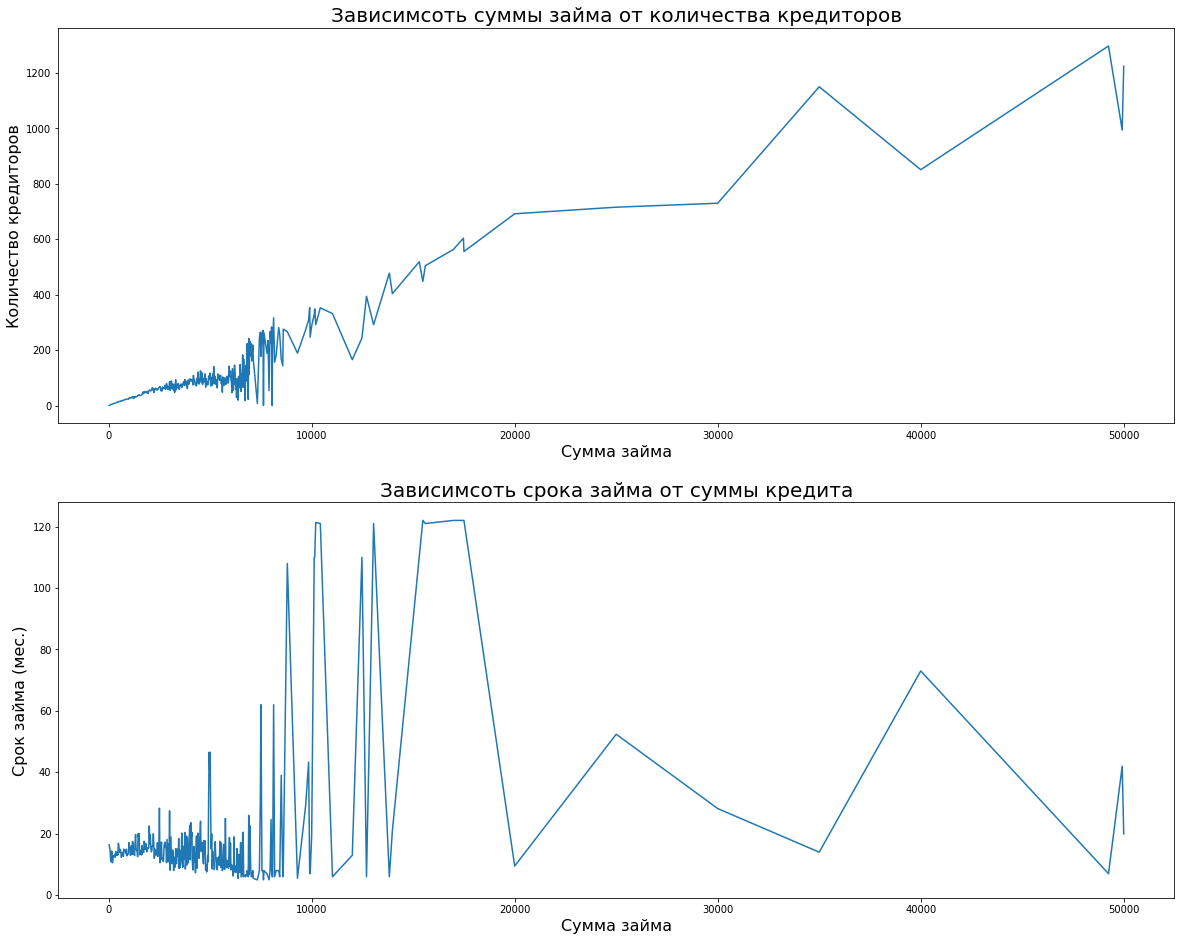

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))
axes[0].plot(df_sum_date['lender_count'])
axes[0].set_ylabel('Количество кредиторов', size=16)
axes[0].set_xlabel('Сумма займа', size=16)
axes[0].set_title('Зависимсоть суммы займа от количества кредиторов', size=20)
axes[1].plot(df_sum_term['term_in_months'])
axes[1].set_ylabel('Срок займа (мес.)', size=16)
axes[1].set_xlabel('Сумма займа', size=16)
axes[1].set_title('Зависимсоть срока займа от суммы кредита', size=20)


## Зависимость суммы займа от количества кредиторов
Вывод: чем больше требуется займ тем более количество кредиторов его обеспечивают
## Зависимость срока займа от суммы кредита
Выводы:
1. Суммы до 7 тысяч долларов берут в среднем на 2 года.
2. Суммы от 7 до 20 тысяч долларов чаще всего берут либо на максимальный срок(10 лет) либо минимальный срок(1 год).
3. Суммы свыше 20 тысяч долларов в среднем беруг на срок от 1 до 5 лет, с ярко выраженными пиками на круглых суммах(20.000, 25.000, 35.000, 40.000, 50.000)

In [160]:
df_sum_date = df_kiva_loans[['lender_count', 'loan_amount']]
# df_sum_date.index = df_sum_date['loan_amount']
df_sum_date = df_sum_date.groupby(['lender_count']).mean()

In [159]:
df_mpi_1 = df_kiva_loans[['country', 'loan_amount']]
df_mpi_1 = df_mpi_1.dropna()
df_mpi_1 = df_mpi_1.groupby(['country']).mean()
df_mpi_2 = df_mpi[['country','MPI']]
df_mpi_2 = df_mpi_2.dropna()
df_mpi_2 = df_mpi_2.groupby(['country']).mean()
result = pd.merge(df_mpi_1, df_mpi_2, how='left', on='country')
result = result.dropna()
result['loan_amount'] = result['loan_amount'].astype(int)

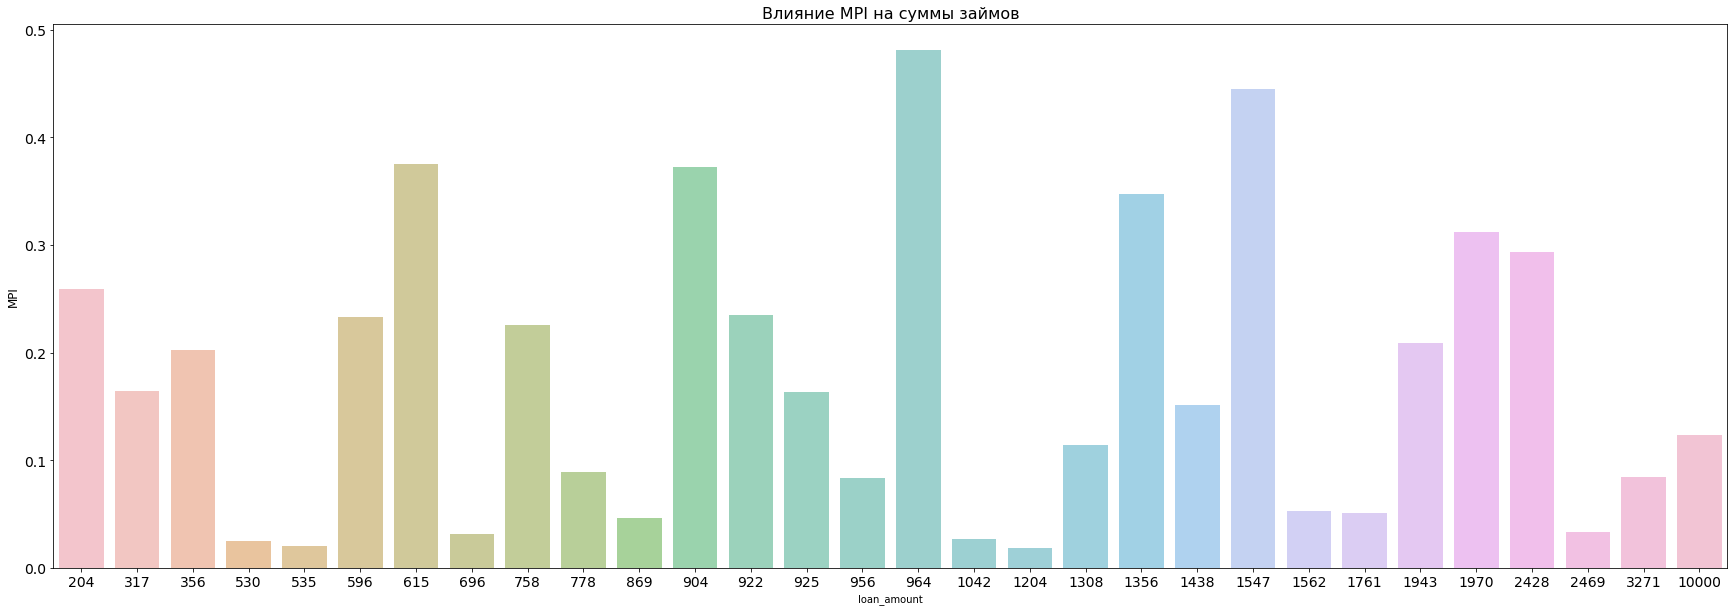

In [144]:


plt.figure(figsize=(30,10))
plt.title("Влияние MPI на суммы займов", fontsize=16)
plt.tick_params(labelsize=14)
plt.ylabel('Многомерный индекс бедности (MPI)', fontsize=12)
plt.xlabel('Сумма займа')
sns.barplot(y=result['MPI'], x=result['loan_amount'], alpha=0.55)
plt.show();

In [158]:
df_mounth = df_kiva_loans[['country', 'term_in_months']]
df_mounth = df_mounth.groupby(['country']).mean().astype(int)
df_mounth_2 = df_mpi[['country','MPI']]
df_mounth_2 = df_mounth_2.dropna()
df_mounth_2 = df_mounth_2.groupby(['country']).mean().round(3)
result_1 = pd.merge(df_mounth, df_mounth_2, how='left', on='country')
result_1 = result_1.dropna()


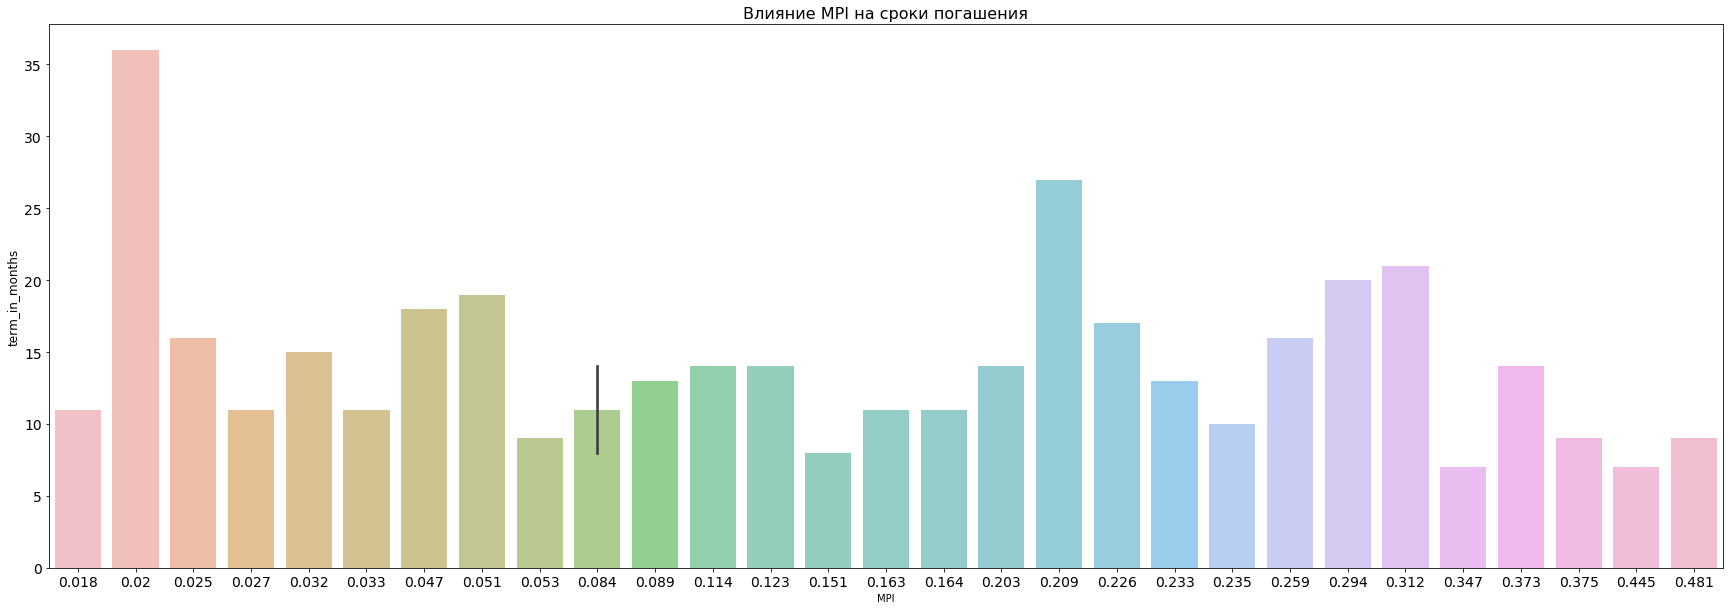

In [157]:
plt.figure(figsize=(30,10))
plt.title("Влияние MPI на сроки погашения", fontsize=16)
plt.tick_params(labelsize=14)
labels = [i for i in result_1.index]
plt.ylabel(labels)
plt.ylabel('Многомерный индекс бедности (MPI)', fontsize=12)
plt.xlabel('Сумма займа')
sns.barplot(y=result_1['term_in_months'], x=result_1['MPI'], alpha=0.60)
plt.show();

# Вывод:
В данных графиках не наблюдается каких-то зависимосте MPI от суммы кредита или сроков займов.

# Зависимости таких метрик как сумма займа, срок займа, время финансирования заявки, ежемесячный платеж в разрезе макрорегионов.

In [297]:
#создаем новый датафрейм
df_makroregion = df_kiva_loans[['world_region', 'loan_amount', 'posted_time', 'disbursed_time', 'term_in_months']]
# те столбцы где есть время переводим 
dates = ['posted_time','disbursed_time']
df_makroregion[dates] = df_makroregion[dates].apply(pd.to_datetime)
# вычисляем разность между подачей заявки и поступлением денег на счет
df_makroregion['time_funding'] = df_makroregion['posted_time'] - df_makroregion['disbursed_time']

# вычисляем ежемесячный платеж
df_makroregion['monthly_repayment'] = df_makroregion['loan_amount'] - df_makroregion['term_in_months']
df_makroregion = df_makroregion.drop(['posted_time', 'disbursed_time'], axis=1)
# переводим в дни без времени
df_makroregion['time_funding'] = df_makroregion['time_funding'].dt.days
# дропаем отрицательные значения по дням
df_makroregion = df_makroregion.drop(df_makroregion[df_makroregion['time_funding'] < 0].index)
df_makroregion = df_makroregion.groupby('world_region').mean().astype(int)
df_makroregion.head(6)

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,loan_amount,term_in_months,time_funding,monthly_repayment
world_region,,,,
Arab States,923,18,16,905
East Asia and the Pacific,453,11,12,441
Europe and Central Asia,954,18,12,935
Latin America and Caribbean,1095,16,12,1079
South Asia,596,13,11,583
Sub-Saharan Africa,734,13,15,720


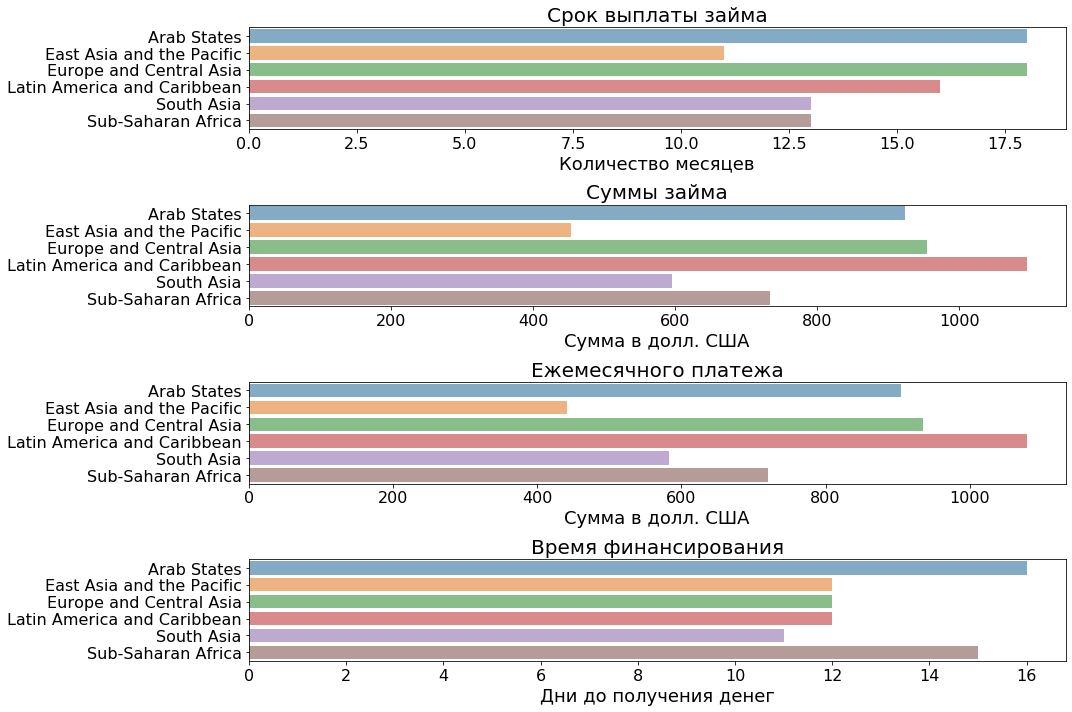

In [298]:
f,ax=plt.subplots(4, 1, sharey=True, figsize=(15,10))

sns.barplot(y=df_makroregion.index, x=df_makroregion['term_in_months'], alpha=0.6, ax=ax[0])
ax[0].set_title("Срок выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=df_makroregion.index, x=df_makroregion['loan_amount'],alpha=0.6, ax=ax[1])
ax[1].set_title("Суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=df_makroregion.index, x=df_makroregion['monthly_repayment'],alpha=0.6, ax=ax[2])
ax[2].set_title("Ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

sns.barplot(y=df_makroregion.index, x=df_makroregion['time_funding'], alpha=0.6, ax=ax[3])
ax[3].set_title("Время финансирования", fontsize=20)
ax[3].set_xlabel('Дни до получения денег', fontsize=18)
ax[3].set_ylabel(None)
ax[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

# Выводы:
1. Наимбольшие суммы займа в арабских странах, наименьшие в восточной азии из чего следует что средний срок выплаты займа и средняя сумма ежемесячного платежа в арабских странах больше остальных, а в странах восточной азии, соотвественно, наименьшее.
2. Время финансирования в странах Восточной Азии, Европы и Латинской Америки в среднем примерно 12 дней, в южной Азии 11 дней, а в Арабских странах и Африке 16 и 15 дней соотвественно.

